<a href="https://colab.research.google.com/github/RahulDs4u/Yulu/blob/main/Business_Case_Yulu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [ ]:
df = pd.read_csv('yulu.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
df["holiday"].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64

In [ ]:
df["workingday"].value_counts()

workingday
1    7412
0    3474
Name: count, dtype: int64

# 1. Define the Problem Statement, Import the required Libraries and perform Exploratory Data Analysis

a. Examine dataset structure, characteristics, and statistical summary.
i. Hint: You can use .shape, .info(), .describe()

In [ ]:
df.shape

(10886, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


b. Identify missing values and perform Imputation using an appropriate method.

i. Hint: You can use .isnull() or .isna()

In [ ]:
df.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

# There is no null value found in yulu data set.

c. Identify and remove duplicate records.
i. Hint: You can use .duplicated()

In [ ]:
df.duplicated().sum()

0

In [ ]:
duplicate_rows = df.duplicated()
duplicate_records = df[duplicate_rows]
duplicate_records

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count


# There is no duplicate record found in yulu data set.

d. Analyze the distribution of Numerical & Categorical variables,separately

1.   For Numerical features use Histogram, Distplot, etc.
2.   For Categorical features use Countplot, Pie Chart, etc.



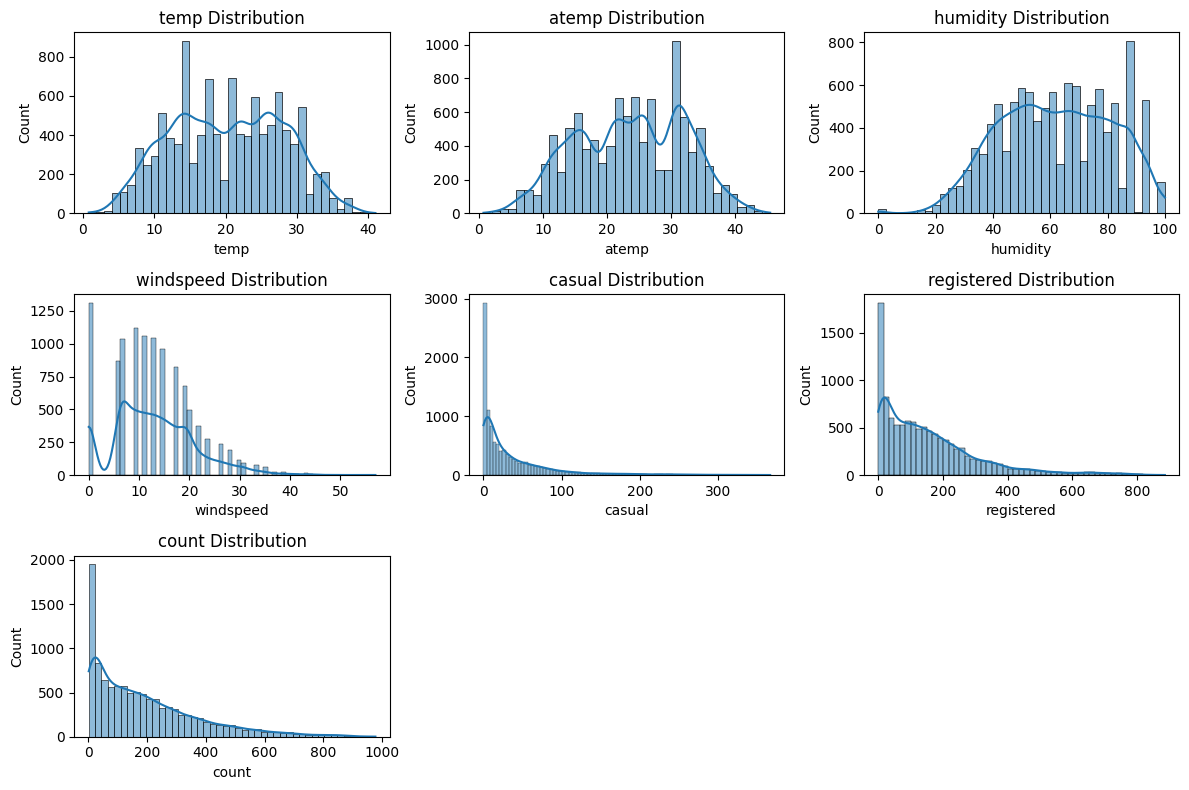

In [ ]:
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']
categorical_features = ['season', 'holiday', 'workingday', 'weather']

# Analyze Numerical Features
plt.figure(figsize=(12, 8))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()





# Insights:
Numerical Features:

* Temperature (temp and atemp): The temperature data is approximately normally distributed, with most values centered around **20-30 degrees Celsius.**
* Humidity (humidity): The distribution of humidity values appears to be slightly right-skewed, with most values clustered around **40-80%**.

*  Windspeed (windspeed): Windspeed values are **right-skewed**, indicating that lower windspeeds are more common than higher windspeeds.

* Count of Total Rentals (count): The distribution of total rentals is **right-skewed**, suggesting that there are more instances of lower rental counts than higher counts.





For Categorical features use Countplot, Pie Chart, etc.

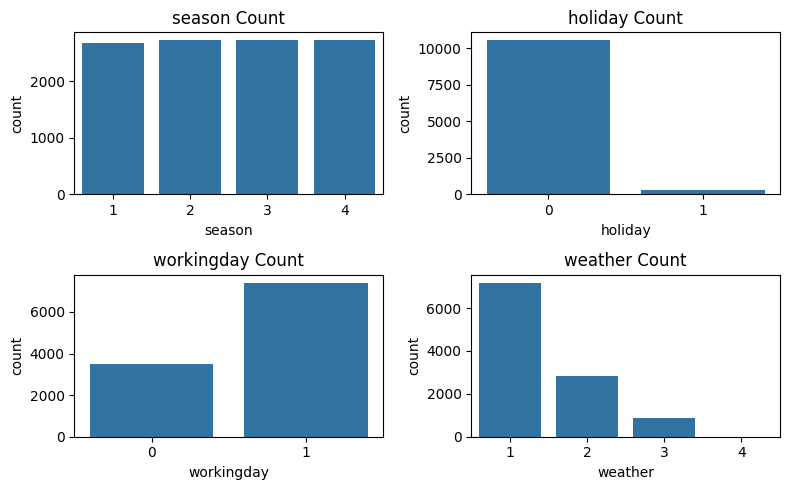

In [ ]:
# Analyze Categorical Features
plt.figure(figsize=(8, 5))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=feature, data=df)
    plt.title(f'{feature} Count')
plt.tight_layout()
plt.show()

# Categorical Features:

* Season (season): The count of rentals is fairly evenly distributed across the four seasons, with a slightly higher count in season 3 (Fall).

*  Holiday (holiday): Most days are not holidays, as indicated by the higher count for holiday=0.

* Weather (weather): The majority of days have a weather category of 1, indicating clear or partly cloudy weather, followed by category 2 (mist, cloudly, or foggy), and very few days with categories 3 and 4 (light rain, heavy rain, ice pellets, or snow).

*  Workingday (workingday): There are more working days (workingday=1) than non-working days (workingday=0).









 # e. Check for Outliers and deal with them accordingly.


*   i. You can use Boxplot, Interquartile Range (IQR)
*   ii. Remove/Clip existing outliers as necessary.




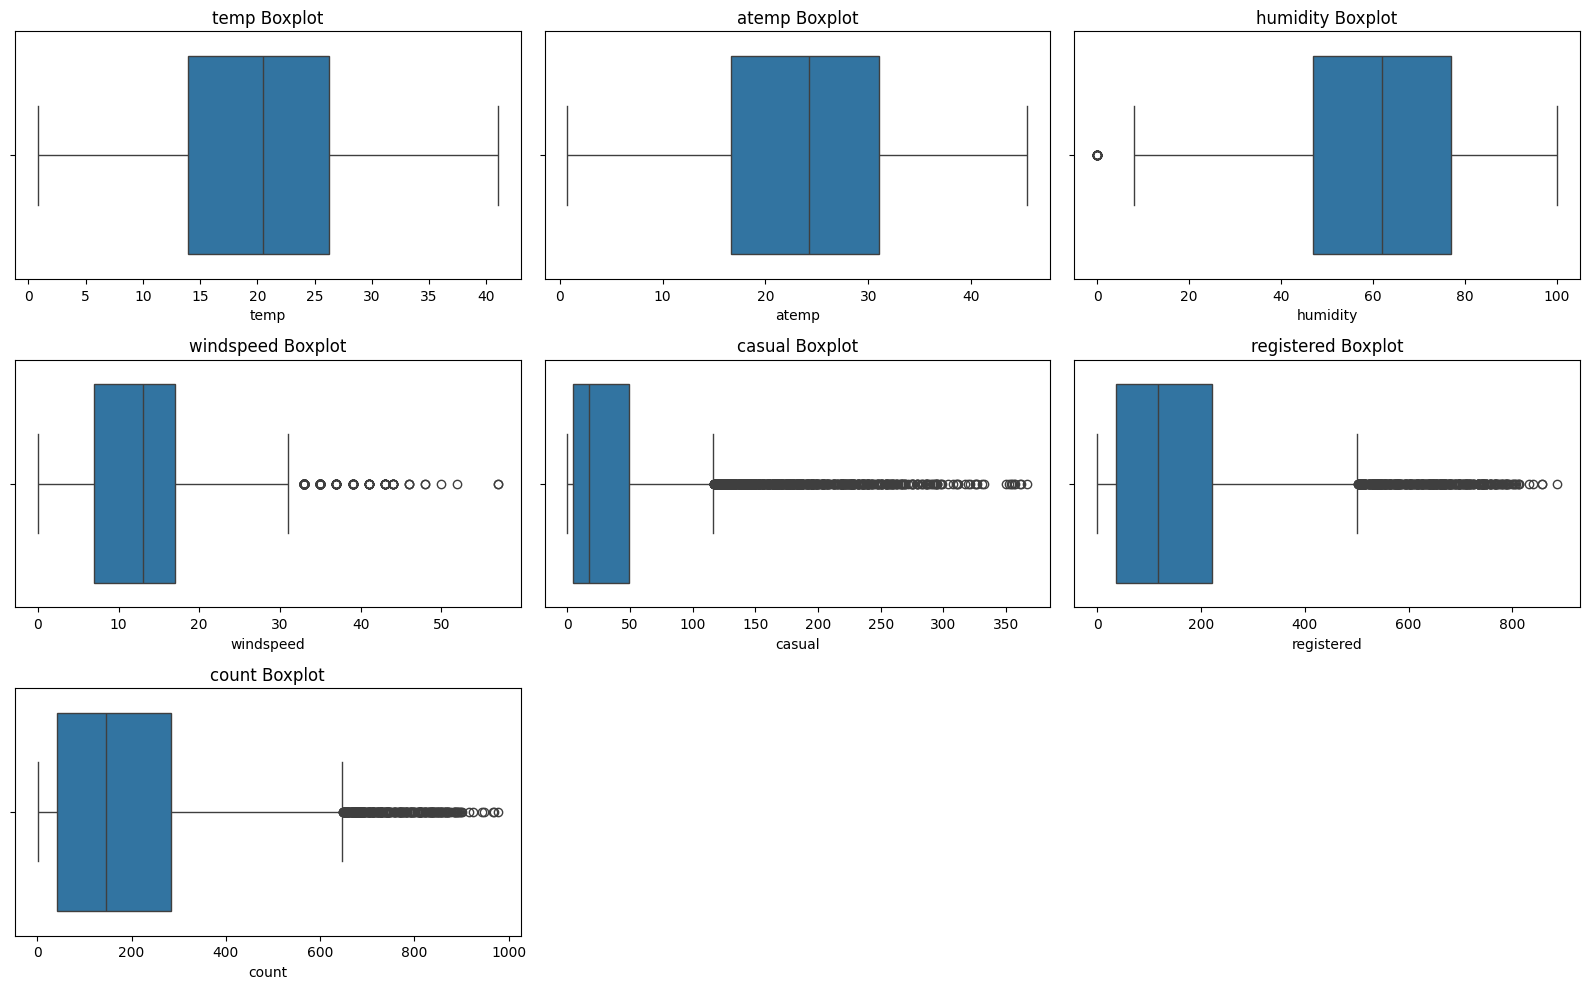

In [ ]:
# Check for Outliers with Boxplots:

# Numerical features
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[feature])
    plt.title(f'{feature} Boxplot')
plt.tight_layout()
plt.show()

# Insights
Total Rentals (count):
There are outliers in the total rentals data, indicating some days with **exceptionally high rental** counts.

These outliers could be due to factors such as holidays, weekends, or other special events.

# ii. Remove/Clip existing outliers as necessary.

In [ ]:
def remove_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_cleaned

# Remove outliers from 'temp', 'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'
for feature in numerical_features:
    df = remove_outliers_iqr(df, feature)

# Display the cleaned DataFrame
print(df.head())


              datetime  season  holiday  workingday  weather  temp   atemp  \
0  2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
1  2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2  2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
3  2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
4  2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

   humidity  windspeed  casual  registered  count  
0        81        0.0       3          13     16  
1        80        0.0       8          32     40  
2        80        0.0       5          27     32  
3        75        0.0       3          10     13  
4        75        0.0       0           1      1  


# 2. Try establishing a Relationship between the Dependent and Independent Variables.

i. Plot a Correlation Heatmap and draw insights.

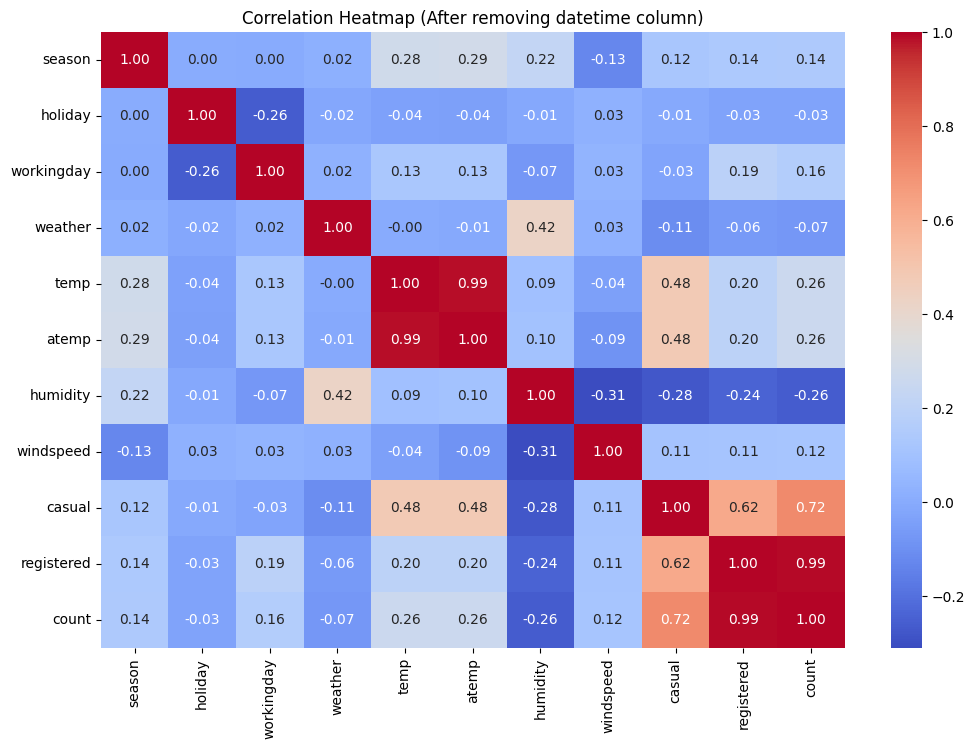

In [ ]:
# Remove datetime column
df_cleaned = df.drop(columns=['datetime'])

# Compute the correlation matrix
corr = df_cleaned.corr()

# Plot the correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (After removing datetime column)')
plt.show()



ii. Remove the highly correlated variables, if any.

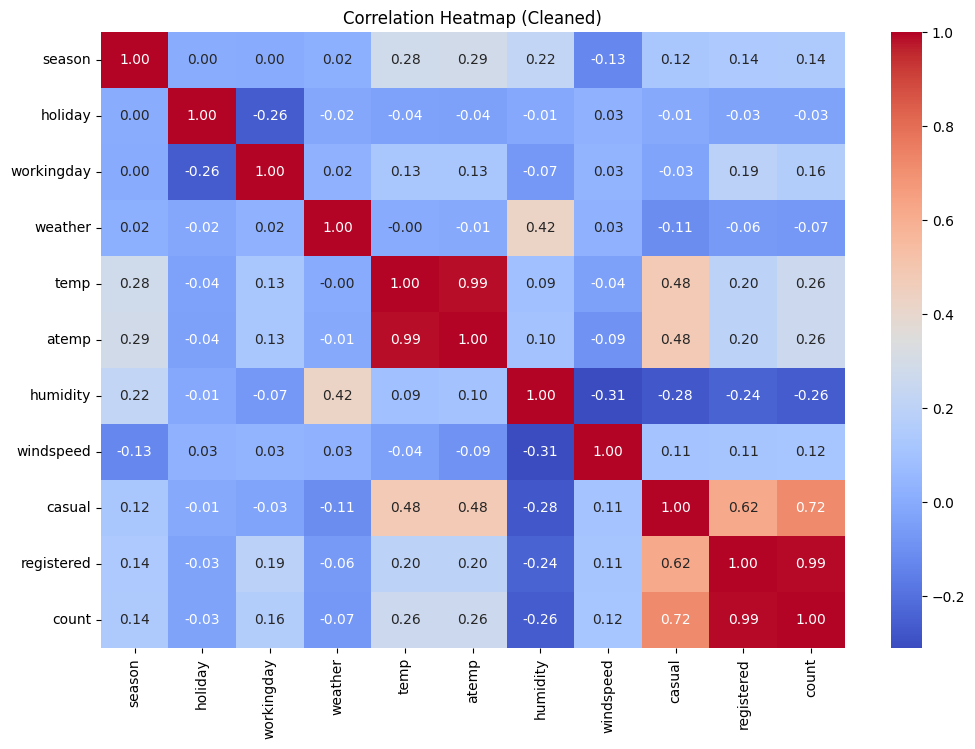

In [ ]:
# Remove highly correlated variables (threshold set to 0.8)
highly_correlated = set()
for i in range(len(corr.columns)):
    for j in range(i):
        if abs(corr.iloc[i, j]) > 0.8:
            colname = corr.columns[i]
            highly_correlated.add(colname)

# Drop highly correlated variables
df_cleaned = df.drop(columns=highly_correlated)

# Remove datetime column
df_cleaned = df.drop(columns=['datetime'])

# Plot the correlation heatmap of cleaned data
corr_cleaned = df_cleaned.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_cleaned, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap (Cleaned)')
plt.show()


In [ ]:
df = pd.read_csv('yulu.csv')

In [ ]:
df['holiday'].value_counts()

holiday
0    10575
1      311
Name: count, dtype: int64


# a. Formulate Null Hypothesis


*  Null Hypothesis (H0): There is no significant difference between the number of bike rides on weekdays and weekends.
*  Alternate Hypothesis (H1): There is a significant difference between the number of bike rides on weekdays and weekends.





# b. Select an Appropriate Test:
2-Sample Independent T-test

# c. Set a Significance Level:
Significance Level: alpha=5%.

# d. Calculate Test Statistics / p-value:

In [ ]:
from scipy.stats import ttest_ind

# Separate data for weekdays and weekends
weekday_rides = df[df['workingday'] == 1]['count']
weekend_rides = df[df['workingday'] == 0]['count']


# Perform 2-sample independent t-test
t_statistic, p_value = ttest_ind(weekday_rides, weekend_rides)

# Print the p-value
print("p-value:", p_value)


p-value: 0.22644804226361348


# e. Decide whether to accept or reject the Null Hypothesis.

With a p-value of 0.2264, which is greater than the significance level of 0.05 , **we fail to reject the null hypothesis.**

Therefore, we do not have enough evidence to conclude that there is a significant difference between the number of bike rides on weekdays and weekends.

In [ ]:
mean_weekday_rides = weekday_rides.mean()
mean_weekend_rides = weekend_rides.mean()
print(mean_weekday_rides)
print()
print(mean_weekend_rides)

193.01187263896384

188.50662061024755


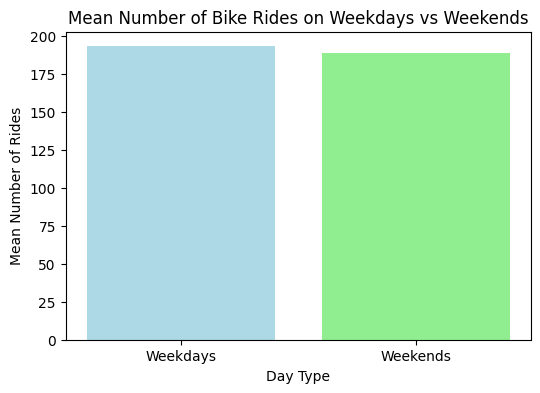

In [ ]:
#  Calculate mean number of rides for weekdays and weekends
mean_weekday_rides = weekday_rides.mean()
mean_weekend_rides = weekend_rides.mean()

plt.figure(figsize=(6, 4))
plt.bar(['Weekdays', 'Weekends'], [mean_weekday_rides, mean_weekend_rides], color=['lightblue', 'lightgreen'])
plt.xlabel('Day Type')
plt.ylabel('Mean Number of Rides')
plt.title('Mean Number of Bike Rides on Weekdays vs Weekends')
plt.show()



**Inferences:**

The mean number of bike rides on **weekdays(193)** is slightly higher than on **weekends(188)**, but this difference is not statistically significant.

The demand for bike rides appears to be relatively consistent throughout the week, with no significant variation between weekdays and weekends.

**Recommendations:**

Bike-sharing companies can maintain a consistent level of service and resources throughout the week, as there is no clear indication of increased demand on weekends.

# 4. Check if the demand of bicycles on rent is the same for different Weather conditions?

# a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):

 (H0): The mean number of bike rides is the same across all weather conditions.

 (H1): The mean number of bike rides is different for at least one weather condition.

# b. Select an appropriate test -

**Test Selection: One-way ANOVA test.**

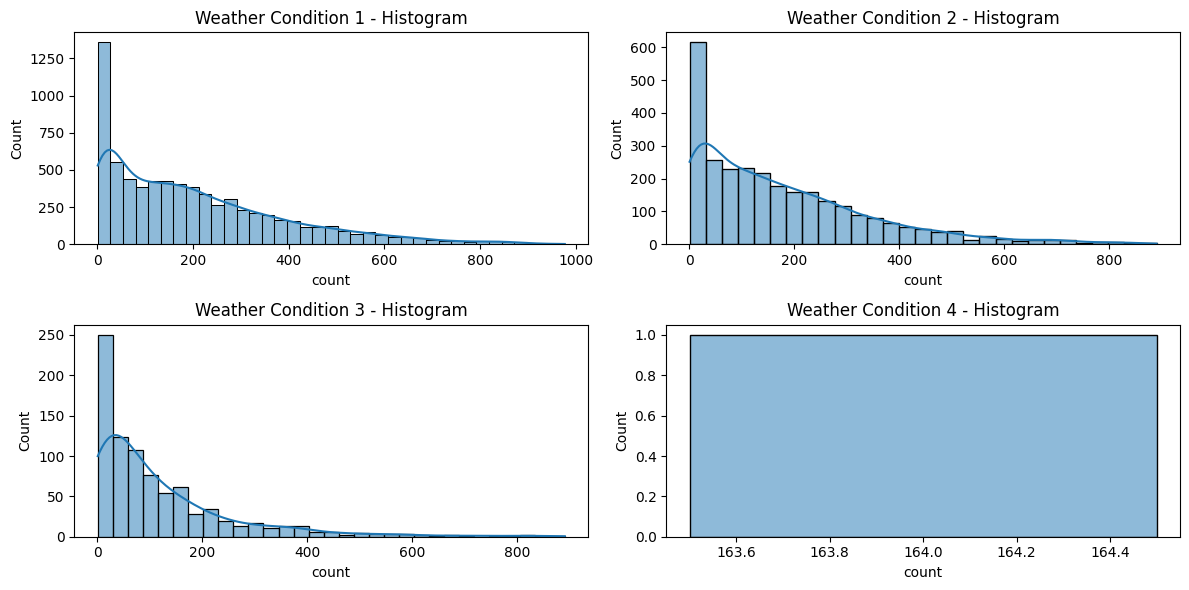

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:182: RuntimeWarning: invalid value encountered in scalar divide
  slope = ssxym / ssxm
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in scalar divide
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


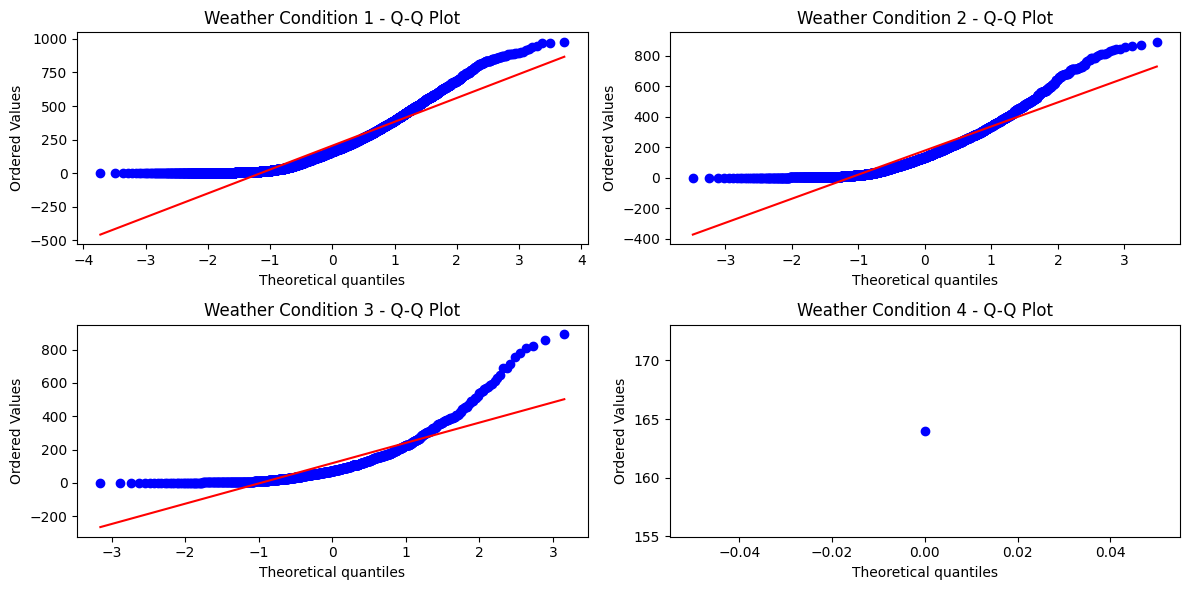

Weather Condition 1 - Skewness: 1.1398572666918205, Kurtosis: 0.964719852310354
Weather Condition 2 - Skewness: 1.294444423357868, Kurtosis: 1.5884304891319174
Weather Condition 3 - Skewness: 2.1871371080456594, Kurtosis: 6.003053730759276
Weather Condition 4 - Skewness: nan, Kurtosis: nan
Weather Condition 1 - Shapiro-Wilk Test: p-value=0.0
Weather Condition 2 - Shapiro-Wilk Test: p-value=9.781063280987223e-43
Weather Condition 3 - Shapiro-Wilk Test: p-value=3.876090133422781e-33
Weather Condition 4 - Not enough data points for Shapiro-Wilk Test

Levene's Test for Equality of Variance: p-value= 3.504937946833238e-35


/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [ ]:
from scipy import stats
from scipy.stats import shapiro, levene

# Separate data for different weather conditions
weather_1 = df[df['weather'] == 1]['count']
weather_2 = df[df['weather'] == 2]['count']
weather_3 = df[df['weather'] == 3]['count']
weather_4 = df[df['weather'] == 4]['count']

# Visual analysis of normality using histograms and Q-Q plots
plt.figure(figsize=(12, 6))
for i, weather in enumerate([weather_1, weather_2, weather_3, weather_4], 1):
    plt.subplot(2, 2, i)
    sns.histplot(weather, kde=True)
    plt.title(f'Weather Condition {i} - Histogram')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for i, weather in enumerate([weather_1, weather_2, weather_3, weather_4], 1):
    plt.subplot(2, 2, i)
    stats.probplot(weather, dist="norm", plot=plt)
    plt.title(f'Weather Condition {i} - Q-Q Plot')
plt.tight_layout()
plt.show()

# Compute skewness and kurtosis
for i, weather in enumerate([weather_1, weather_2, weather_3, weather_4], 1):
    skew = weather.skew()
    kurt = weather.kurtosis()
    print(f'Weather Condition {i} - Skewness: {skew}, Kurtosis: {kurt}')

# Shapiro-Wilk's test for normality

for i, weather in enumerate([weather_1, weather_2, weather_3, weather_4], 1):
    if len(weather) >= 3:  # Check if the array has at least 3 data points
        stat, p = stats.shapiro(weather)
        print(f'Weather Condition {i} - Shapiro-Wilk Test: p-value={p}')
    else:
        print(f'Weather Condition {i} - Not enough data points for Shapiro-Wilk Test')


# Levene's test for equality of variance
stat, p = stats.levene(weather_1, weather_2, weather_3, weather_4)
print('\nLevene\'s Test for Equality of Variance: p-value=', p)



# d. Set a significance level and Calculate the test Statistics p-value.
i. alpha=5%

e. Decide whether to accept or reject the Null Hypothesis.

In [ ]:
from scipy.stats import f_oneway

# Perform the one-way ANOVA test
f_statistic, p_value = f_oneway(weather_1, weather_2, weather_3, weather_4)

# Set the significance level
alpha = 0.05

# Decision based on the p-value
if p_value <= alpha:
    print(f"Reject the null hypothesis. There is a significant difference in bike demand across different weather conditions.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in bike demand across different weather conditions.")

# Print the test statistics and p-value
print(f"ANOVA F-statistic: {f_statistic}, p-value: {p_value}")


Reject the null hypothesis. There is a significant difference in bike demand across different weather conditions.
ANOVA F-statistic: 65.53024112793271, p-value: 5.482069475935669e-42


**Inferences:**

The ANOVA test results indicate that there is a **significant difference in bike demand across different weather conditions** (p < 0.05). This implies that weather conditions have an impact on the demand for rental bikes.


**Skewness and kurtosis** values suggest that the data for each weather condition may not be perfectly normally distributed. However, since ANOVA is robust to violations of normality when sample sizes are large, this should not affect the validity of the ANOVA results significantly.


**The Shapiro-Wilk tests** confirm that the data for weather conditions 1, 2, and 3 are not normally distributed (p < 0.05). Weather condition 4 has insufficient data for the Shapiro-Wilk test.


**Levene's test for equality** of variance indicates that the variances of the bike demand across different weather conditions are significantly different (p < 0.05). This violates the assumption of homogeneity of variances required for ANOVA. However, since ANOVA is robust to violations of homogeneity of variances when sample sizes are large, this violation should not affect the validity of the ANOVA results significantly.


**Recommendations:**

Adjust bike availability based on weather conditions: Since **weather conditions significantly affect bike demand,** consider adjusting the availability of bikes based on weather forecasts. For example, increase the number of bikes available during clear weather when demand is high.







# 5. Check if the demand of bicycles on rent is the same for different Seasons?

# a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1):

Null Hypothesis (H0): The demand for bicycles on rent is the same across different seasons.

Alternate Hypothesis (H1): The demand for bicycles on rent is not the same across different seasons.

# b. Select an appropriate test -

**One-way ANOVA test** is appropriate for comparing the means of a numerical variable (demand for bicycles) across multiple groups (seasons).

# c. Check assumptions of the test:
i. Normality:
Use Histogram, Q-Q Plot, Skewness & Kurtosis
Shapiro-Wilk’s test

ii. Equality Variance:
Levene’s test
Assumption Check:

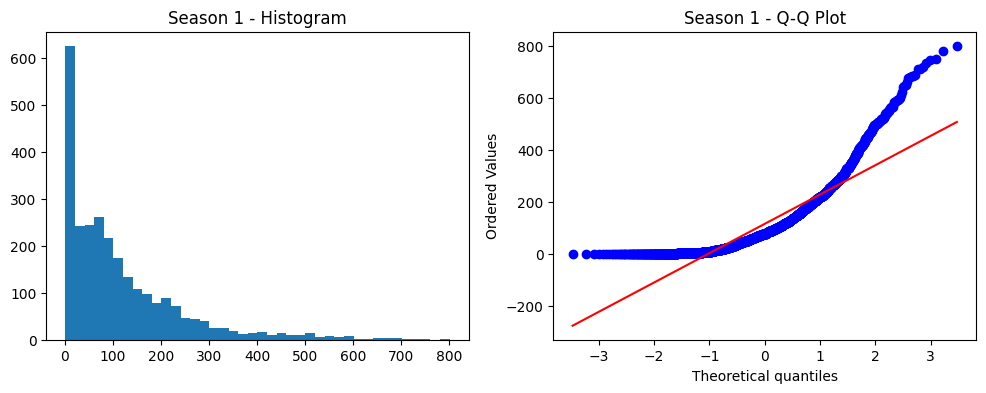

Season 1 - Shapiro-Wilk Test: p-value=0.0


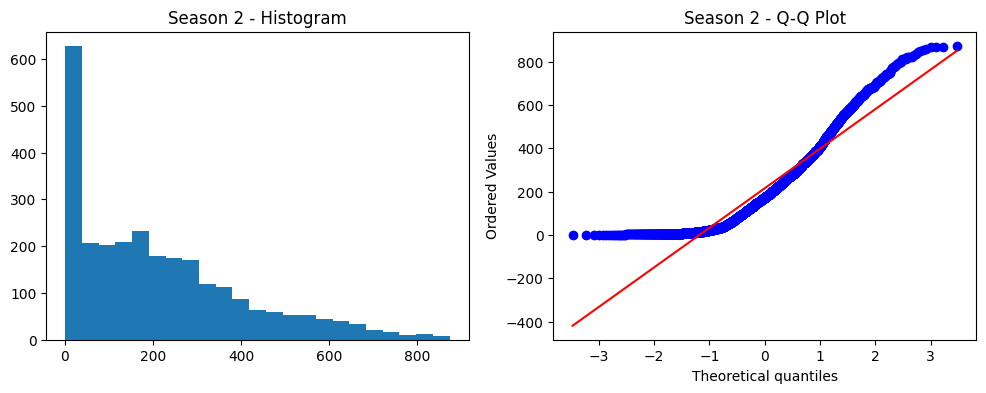

Season 2 - Shapiro-Wilk Test: p-value=6.039093315091269e-39


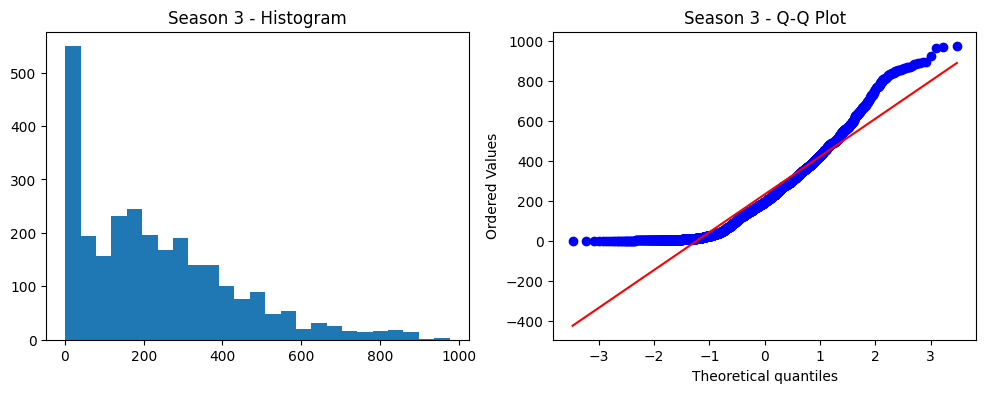

Season 3 - Shapiro-Wilk Test: p-value=1.043458045587339e-36


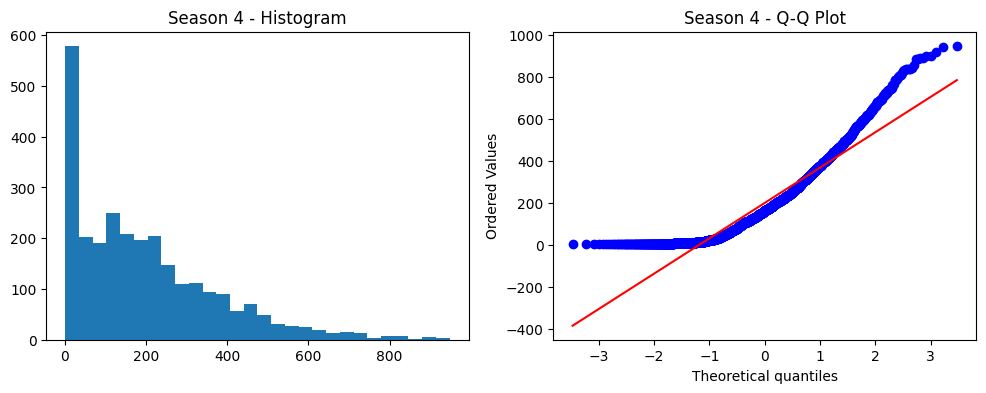

Season 4 - Shapiro-Wilk Test: p-value=1.1301682309549298e-39

Levene's Test for Equality of Variance: p-value= 1.0147116860043298e-118


In [ ]:
from scipy import stats
import matplotlib.pyplot as plt

# Perform checks for normality and equality of variance for demand across seasons
for season in [1, 2, 3, 4]:
    season_data = df[df['season'] == season]['count']
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.hist(season_data, bins='auto')
    plt.title(f'Season {season} - Histogram')

    plt.subplot(1, 2, 2)
    stats.probplot(season_data, dist="norm", plot=plt)
    plt.title(f'Season {season} - Q-Q Plot')
    plt.show()

    # Shapiro-Wilk's test for normality
    stat, p = stats.shapiro(season_data)
    print(f'Season {season} - Shapiro-Wilk Test: p-value={p}')

# Levene's test for equality of variance
stat, p = stats.levene(df[df['season'] == 1]['count'],
                        df[df['season'] == 2]['count'],
                        df[df['season'] == 3]['count'],
                        df[df['season'] == 4]['count'])
print('\nLevene\'s Test for Equality of Variance: p-value=', p)


# d. Set a significance level and Calculate the test Statistics / p-value.
i.  alpha=5%

In [ ]:
from scipy import stats

# Kruskal-Wallis test
statistic, p_value = stats.kruskal(
    df[df['season'] == 1]['count'],
    df[df['season'] == 2]['count'],
    df[df['season'] == 3]['count'],
    df[df['season'] == 4]['count']
)

print(f"Kruskal-Wallis Test Statistic: {statistic}")
print(f"P-value: {p_value}")


Kruskal-Wallis Test Statistic: 699.6668548181988
P-value: 2.479008372608633e-151


With a **Kruskal-Wallis test** **statistic of 699.67 **and a p-value of approximately 0, **we reject the null hypothesis.**
This indicates that there is a significant difference in the demand for bicycles on rent across different seasons.

**Inferences:**
The Kruskal-Wallis test indicates a significant difference in the demand for bicycles on rent across different seasons (p < 0.05).


Shapiro-Wilk tests for normality suggest that the demand for bicycles on rent is not normally distributed for each season (p < 0.05).


Levene's test for equality of variance indicates that the variances of the demand for bicycles on rent across different seasons are significantly different (p < 0.05).


**Recommendations:**
Seasonal adjustments: Adjust bike availability and marketing strategies based on seasonal demand patterns to optimize resources and customer satisfaction.


Further investigation: Conduct further investigation into the factors driving the differences in demand across seasons, considering external factors such as weather conditions, holidays, or events.


**Conclusion:**
Based on the results, there is a significant difference in the demand for bicycles on rent across different seasons. Further analysis and adjustments based on seasonal patterns can help optimize bike rental services.








# 6. Check if the Weather conditions are significantly different during different Seasons?


a. Formulate Null Hypothesis (H0) and Alternate Hypothesis (H1) :

**Null Hypothesis (H0)**: There is no significant association between weather conditions and seasons.

**Alternative Hypothesis (H1)**: There is a significant association between weather conditions and seasons.

# b. Select an appropriate test -

**chi-square test** for independence to analyze the relationship between the categorical variables (Weather and Season).

# c. Create a Contingency Table against ‘Weather’ & ‘Season’ columns

In [ ]:
contingency_table = pd.crosstab(df['weather'], df['season'])
print(contingency_table)
import pandas as pd




season      1     2     3     4
weather                        
1        1759  1801  1930  1702
2         715   708   604   807
3         211   224   199   225
4           1     0     0     0


# d. Set a significance level and Calculate the test Statistics / p-value.
i.  alpha=5% is recommended

In [ ]:
from scipy.stats import chi2_contingency

# Assuming contingency_table is the contingency table created using crosstab
chi2, p, dof, expected = chi2_contingency(contingency_table)

print("Chi-square Test Statistic:", chi2)
print("P-value:", p)


Chi-square Test Statistic: 49.15865559689363
P-value: 1.5499250736864862e-07


# e. Decide whether to accept or reject the Null Hypothesis.

With a **chi-square test statistic of 49.16** and a p-value of approximately 0, we **reject the null hypothesis**. This indicates that there is a significant association between weather conditions and seasons.

# f. Draw inferences & conclusions from the analysis and provide recommendations.


With a chi-square test statistic of 49.16 and a p-value of approximately 0, we reject the null hypothesis. This indicates that there is a significant association between weather conditions and seasons.

The p-value being much lower than the significance level of 0.05 suggests strong evidence against the null hypothesis.



The analysis implies that weather conditions are not evenly distributed across different seasons.

This finding could be used to enhance seasonal planning, such as adjusting inventory levels, scheduling outdoor events, or implementing seasonal marketing strategies that consider weather-related factors.



**Recommendations:**

Businesses can tailor their offerings and marketing strategies based on weather conditions during different seasons to better meet customer needs.


Urban planners and policymakers can use this information to design infrastructure that is more resilient to seasonal weather variations.


Weather forecasting models can be improved by incorporating the observed seasonal weather patterns.

**Bike Rental Business:**


**Seasonal Variations**: Adjust bike inventory and marketing strategies based on seasonal demand patterns identified in the analysis. Increase bike availability during high-demand seasons to meet customer needs.


**Weather Sensitivity**: Consider offering promotions or discounts during inclement weather to encourage rentals. Provide weather-appropriate gear or accessories to enhance customer experience.


**Customer Segmentation:** Utilize insights from casual and registered user analysis to tailor marketing campaigns and loyalty programs for different customer segments.


**Weather Impact:**

**Weather Forecasting:** Collaborate with meteorological services to improve weather forecasting models, especially during peak rental seasons, to anticipate and plan for weather-related fluctuations in demand.

**Infrastructure Planning:** Consider the impact of weather conditions on infrastructure needs, such as bike lane maintenance and expansion, to ensure safe and convenient biking experiences.


